In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_taxi = pd.read_csv('../data/nyc_taxi.csv')
df_taxi.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
df_taxi.dtypes

timestamp    object
value         int64
dtype: object

In [4]:
df_taxi["timestamp"]= pd.to_datetime(df_taxi["timestamp"])

Let's take a look at the average number of riders

In [5]:
print(df_taxi['value'].mean())

15137.569379844961


Let's visualize the data to understand it better

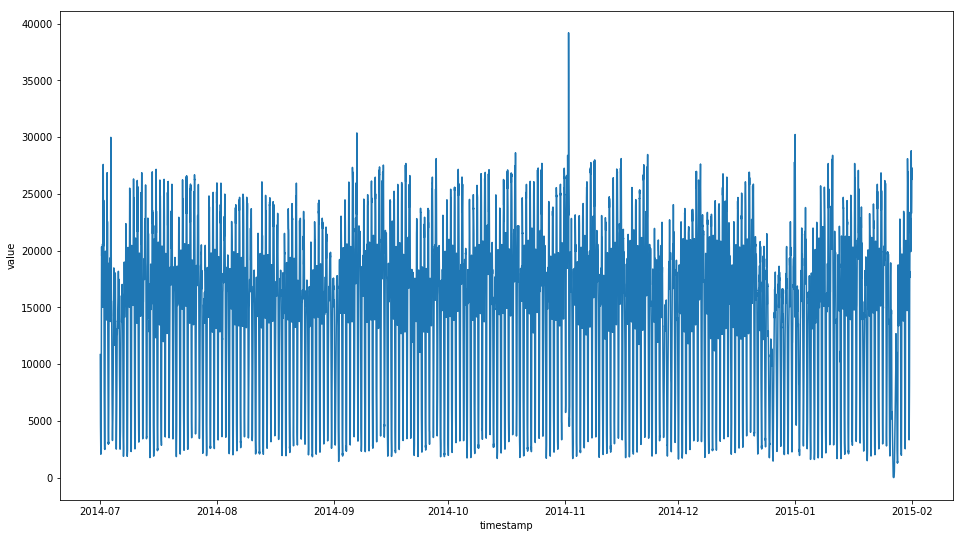

In [6]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x="timestamp", y="value", data=df_taxi, ax=ax)
plt.show()

Here we Can see we have a few high anomalies: early July, early September, early November, and January. We also have one low anomaly in the end of January. We also observe the cyclical nature of ridership; the pattern being ridership increasing as the week goes on where the lowest day is Monday.

In [7]:
def timeofday_f(hour):
    if (hour >= 8) and (hour <= 17):
        return "work hours"
    elif (hour > 17) and (hour <= 22):
        return "after work"
    elif (hour > 22) or ((hour >= 0) and (hour <= 4)):
        return "late night"
    else:
        return "early morning"

In [8]:
df_taxi['hour'] = df_taxi['timestamp'].dt.hour.astype(int)
df_taxi['DayOfTheWeek'] = df_taxi['timestamp'].dt.dayofweek
df_taxi['WeekDay'] = (df_taxi['DayOfTheWeek'] < 5).astype(int)

In [9]:
df_taxi.head(30)

,timestamp,value,hour,DayOfTheWeek,WeekDay
0,2014-07-01 00:00:00,10844,0,1,1
1,2014-07-01 00:30:00,8127,0,1,1
2,2014-07-01 01:00:00,6210,1,1,1
3,2014-07-01 01:30:00,4656,1,1,1
4,2014-07-01 02:00:00,3820,2,1,1
5,2014-07-01 02:30:00,2873,2,1,1
6,2014-07-01 03:00:00,2369,3,1,1
7,2014-07-01 03:30:00,2064,3,1,1
8,2014-07-01 04:00:00,2221,4,1,1
9,2014-07-01 04:30:00,2158,4,1,1


In [10]:
df_taxi['timeofday'] = df_taxi.apply(lambda row : timeofday_f(row['hour']), axis=1)

In [11]:
df_taxi.head(50)

,timestamp,value,hour,DayOfTheWeek,WeekDay,timeofday
0,2014-07-01 00:00:00,10844,0,1,1,late night
1,2014-07-01 00:30:00,8127,0,1,1,late night
2,2014-07-01 01:00:00,6210,1,1,1,late night
3,2014-07-01 01:30:00,4656,1,1,1,late night
4,2014-07-01 02:00:00,3820,2,1,1,late night
5,2014-07-01 02:30:00,2873,2,1,1,late night
6,2014-07-01 03:00:00,2369,3,1,1,late night
7,2014-07-01 03:30:00,2064,3,1,1,late night
8,2014-07-01 04:00:00,2221,4,1,1,late night
9,2014-07-01 04:30:00,2158,4,1,1,late night


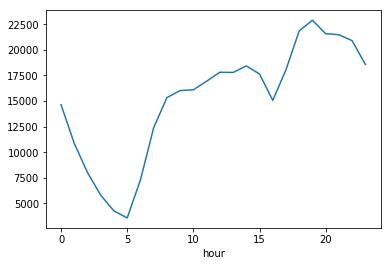

In [12]:
df_taxi.groupby('hour')['value'].mean().plot()

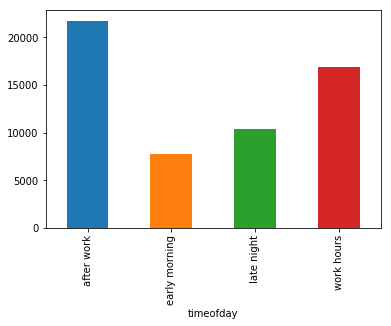

In [13]:
df_taxi.groupby('timeofday')['value'].mean().plot(kind='bar')

We can see that the busiest hours for taxis by a huge margin are after work hours (5pm - 10pm) followed by work hours (8am-5pm)

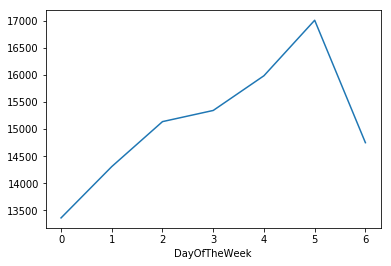

In [14]:
df_taxi.groupby('DayOfTheWeek')['value'].mean().plot()

Here we can see that ridership increases everyday until it hits its peak on Friday

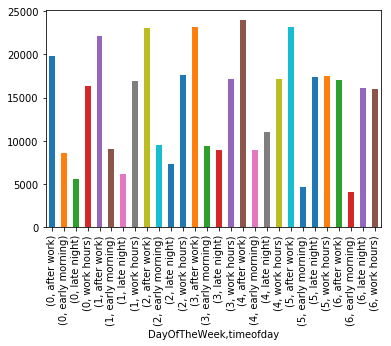

In [15]:
df_taxi.groupby(['DayOfTheWeek', 'timeofday'])['value'].mean().plot(kind='bar')

Here we can see that the highest ridership numbers are basically Thursday and Friday evenings. Pretty consistent for a city like New York with a busy nightlife.

In [16]:
#create a time epoch for easy plotting of time series
df_taxi['time_epoch'] = (df_taxi['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

In [17]:
from sklearn.preprocessing import LabelEncoder
#encode values of timeofday for use in models
le = LabelEncoder()
le.fit(df_taxi['timeofday'])
df_taxi['timeofday_enc'] = le.transform(df_taxi['timeofday'])

In [18]:
df_taxi.head(20)

,timestamp,value,hour,DayOfTheWeek,WeekDay,timeofday,time_epoch,timeofday_enc
0,2014-07-01 00:00:00,10844,0,1,1,late night,14041728,2
1,2014-07-01 00:30:00,8127,0,1,1,late night,14041746,2
2,2014-07-01 01:00:00,6210,1,1,1,late night,14041764,2
3,2014-07-01 01:30:00,4656,1,1,1,late night,14041782,2
4,2014-07-01 02:00:00,3820,2,1,1,late night,14041800,2
5,2014-07-01 02:30:00,2873,2,1,1,late night,14041818,2
6,2014-07-01 03:00:00,2369,3,1,1,late night,14041836,2
7,2014-07-01 03:30:00,2064,3,1,1,late night,14041854,2
8,2014-07-01 04:00:00,2221,4,1,1,late night,14041872,2
9,2014-07-01 04:30:00,2158,4,1,1,late night,14041890,2


Let's use to Isolation Forest to detect the anomalies in the data set

In [19]:
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

In [20]:
outliers_fraction = 0.01
data = df_taxi[['value', 'hour', 'DayOfTheWeek', 'WeekDay', 'timeofday_enc']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
df_taxi['anomaly'] = pd.Series(model.predict(data))
df_taxi['anomaly'] = df_taxi['anomaly'].map( {1: 0, -1: 1} )
print(df_taxi['anomaly'].value_counts())

0    10216
1      104
Name: anomaly, dtype: int64


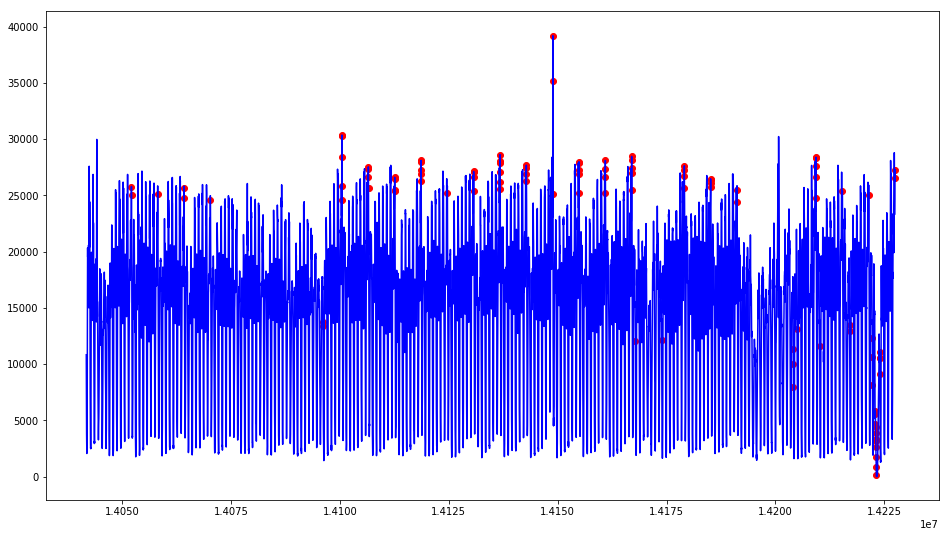

In [21]:
fig, ax = plt.subplots(figsize=(16,9))

a = df_taxi.loc[df_taxi['anomaly'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df_taxi['time_epoch'], df_taxi['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

It can be observed that the Isolation Forest detected more anomalies than we were able to detect visually. Many of The high anomalies seem to just be Fridays (the highest ridership day), and the low anomalies seem to be Mondays (also expected). The algorithm obviously also detected the anomalies that we pointed out which if the dates were checked turned out to be the NYC marathon in early November, Thanksgiving, Christmas Day and Eve, New Years day, and a snow storm in January (the low).

In [22]:
#sources https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection